## Fraud Detection

## Import Libraries and Data

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)
from IPython.display import Image
from IPython.display import HTML
from IPython.display import Markdown, display
def printmd(string):display(Markdown(string))
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox
pd.options.display.max_rows = 100
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
import plotly.graph_objects as go
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import plotly.express as px
import plotly.figure_factory as ff

In [2]:
file = pd.read_csv("fraudTrain.csv")
file2 = pd.read_csv("fraudTest.csv")

## Concating both tables

In [3]:
ft = pd.concat([file,file2],axis = 0, sort=False).reset_index(drop=True)

In [4]:
ft = ft.drop(["Unnamed: 0", "long","lat","merch_lat","merch_long"], axis=1)
ft

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,city_pop,job,dob,trans_num,unix_time,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,MO,63453,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,0
1852390,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,77566,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,0
1852391,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,99323,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,0
1852392,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,ID,83643,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,0


## Describing Data

In [5]:
ft.describe()

,cc_num,amt,zip,city_pop,unix_time,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,4.173860e+17,7.006357e+01,4.881326e+04,8.864367e+04,1.358674e+09,5.210015e-03
std,1.309115e+18,1.592540e+02,2.688185e+04,3.014876e+05,1.819508e+07,7.199217e-02
min,6.041621e+10,1.000000e+00,1.257000e+03,2.300000e+01,1.325376e+09,0.000000e+00
25%,1.800429e+14,9.640000e+00,2.623700e+04,7.410000e+02,1.343017e+09,0.000000e+00
50%,3.521417e+15,4.745000e+01,4.817400e+04,2.443000e+03,1.357089e+09,0.000000e+00
75%,4.642255e+15,8.310000e+01,7.204200e+04,2.032800e+04,1.374581e+09,0.000000e+00
max,4.992346e+18,2.894890e+04,9.992100e+04,2.906700e+06,1.388534e+09,1.000000e+00


trans_date_trans_time = Transaction date and time
cc_num = Creditcard Number
merchant = Name of Seller
category = Branch
amt = Amount
first = First Name
last = Last Name
gender = Gender
street = Address
City = City
Lat = Latitude
Long = Longitude
city_pop = City Population
job = Profession
dob = Date of Birth
trans_num = Transaction Number
unix_time = Time in seconds
merch_lat = Seller Latitude
merch_long = Seller Longitude
is_fraud = Is a Fraud or not

In [6]:
ft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  city_pop               int64  
 13  job                    object 
 14  dob                    object 
 15  trans_num              object 
 16  unix_time              int64  
 17  is_fraud               int64  
dtypes: float64(1), int64(5), object(12)
memory usage: 254.4+ MB


In [7]:
colors = ['gold', 'mediumturquoise']
labels = ['Normal','Fraud']
values = ft['is_fraud'].value_counts()/ft['is_fraud'].shape[0]
fig = go.Figure(data=[go.Pie(labels = labels,
                             values=values,hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='white', width=0.1)))
fig.update_layout(
    title_text="Credit Card Fraud",
    title_font_color="white",
    legend_title_font_color="yellow",
    paper_bgcolor="black",
    plot_bgcolor='black',
    font_color="white",
)
fig.show()

## Visualization

### Transactions in time

In [8]:
#ft['unix_time'] = pd.to_datetime(ft['unix_time'],unit='s')

In [9]:
class_0 = ft.loc[ft['is_fraud'] == 0]["unix_time"]
class_1 = ft.loc[ft['is_fraud'] == 1]["unix_time"]

hist_data = [class_0, class_1]
group_labels = ['Not Fraud', 'Fraud']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Credit Card Transactions Time Density Plot', xaxis=dict(title='Time [s]'))
iplot(fig, filename='dist_only')

### Amount vs Fraud

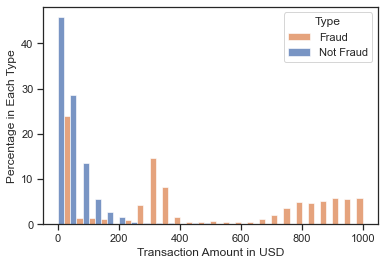

In [10]:
#amount vs fraud
ax=sns.histplot(x='amt',data=ft[ft.amt<=1000],hue='is_fraud',stat='percent',multiple='dodge',common_norm=False,bins=25)
ax.set_ylabel('Percentage in Each Type')
ax.set_xlabel('Transaction Amount in USD')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

The result is very interesting! While normal transactions tend to be around 200 Dollars or less, we see fraudulent transactions peak around 300 Dollars and then at the 800-1000 Dollars range. There is a very clear pattern here!

### The Percentage Difference of Fraudulent over Non-Fraudulent Transations in Each Spending Category

Text(0.5, 1.0, 'The Percentage Difference of Fraudulent over Non-Fraudulent Transations in Each Spending Category ')

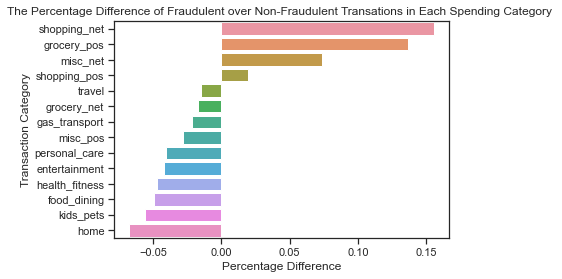

In [11]:
#calculate the percentage difference
a=ft[ft['is_fraud']==0]['category'].value_counts(normalize=True).to_frame().reset_index()
a.columns=['category','not fraud percentage']

b=ft[ft['is_fraud']==1]['category'].value_counts(normalize=True).to_frame().reset_index()
b.columns=['category','fraud percentage']
ab=a.merge(b,on='category')
ab['diff']=ab['fraud percentage']-ab['not fraud percentage']

ax=sns.barplot(y='category',x='diff',data=ab.sort_values('diff',ascending=False))
ax.set_xlabel('Percentage Difference')
ax.set_ylabel('Transaction Category')
plt.title('The Percentage Difference of Fraudulent over Non-Fraudulent Transations in Each Spending Category ')

### Time in a day vs Fraud

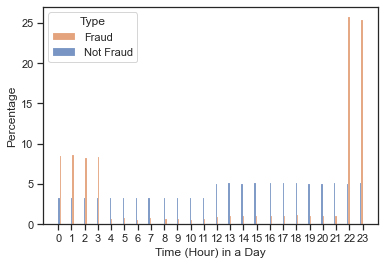

In [12]:
#time in a day vs fraud
ft['hour']=pd.to_datetime(ft['trans_date_trans_time']).dt.hour
ax=sns.histplot(data=ft, x="hour", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
ax.set_ylabel('Percentage')
ax.set_xlabel('Time (Hour) in a Day')
plt.xticks(np.arange(0,24,1))
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

In [16]:
ft[(ft["last"]=="Williams") & (ft["first"]=="Mary") & (ft["is_fraud"]== 1)]

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,city_pop,job,dob,trans_num,unix_time,is_fraud,hour
1623751,2020-10-24 18:47:50,4599285557366057,"fraud_Streich, Dietrich and Barton",shopping_net,966.98,Mary,Williams,F,00315 Ashley Valleys,Burrton,KS,67020,1689,Gaffer,1997-11-18,7dbf64c03c549a79e30533c41c2ea5fe,1382640470,1,18
1623891,2020-10-24 20:25:22,4599285557366057,"fraud_Reichert, Shanahan and Hayes",shopping_net,1140.88,Mary,Williams,F,00315 Ashley Valleys,Burrton,KS,67020,1689,Gaffer,1997-11-18,93f5d23515f0e7b79ffa206878839c78,1382646322,1,20
1624131,2020-10-24 23:14:06,4599285557366057,"fraud_Heathcote, Yost and Kertzmann",shopping_net,1139.97,Mary,Williams,F,00315 Ashley Valleys,Burrton,KS,67020,1689,Gaffer,1997-11-18,ab91e7ff19e264deab202d3edb8be36d,1382656446,1,23
1624205,2020-10-24 23:53:11,4599285557366057,"fraud_Okuneva, Schneider and Rau",shopping_pos,1252.51,Mary,Williams,F,00315 Ashley Valleys,Burrton,KS,67020,1689,Gaffer,1997-11-18,0eefd12b0610c181ed68a0391e09a0b0,1382658791,1,23
1624239,2020-10-25 00:15:29,4599285557366057,fraud_Barton Inc,grocery_pos,278.59,Mary,Williams,F,00315 Ashley Valleys,Burrton,KS,67020,1689,Gaffer,1997-11-18,3c3e30994b2dd6d7f05602dc73d78ee4,1382660129,1,0
1624430,2020-10-25 02:31:32,4599285557366057,"fraud_Swift, Bradtke and Marquardt",grocery_net,11.43,Mary,Williams,F,00315 Ashley Valleys,Burrton,KS,67020,1689,Gaffer,1997-11-18,61af2a09489f4d07ca8cf1566d14879c,1382668292,1,2
1624501,2020-10-25 03:24:29,4599285557366057,fraud_O'Keefe-Hudson,grocery_pos,310.37,Mary,Williams,F,00315 Ashley Valleys,Burrton,KS,67020,1689,Gaffer,1997-11-18,316c009ec5c6c13de10869b9f8926ebc,1382671469,1,3
1624556,2020-10-25 03:59:34,4599285557366057,fraud_Kiehn Inc,grocery_pos,336.84,Mary,Williams,F,00315 Ashley Valleys,Burrton,KS,67020,1689,Gaffer,1997-11-18,d7426d345bf54c4246938c3ae0a9099d,1382673574,1,3
1624867,2020-10-25 07:35:06,4599285557366057,"fraud_Robel, Cummerata and Prosacco",gas_transport,10.36,Mary,Williams,F,00315 Ashley Valleys,Burrton,KS,67020,1689,Gaffer,1997-11-18,6eb66645436ea2d4fb4f06895f2cf0e0,1382686506,1,7
1626512,2020-10-25 20:58:22,4599285557366057,"fraud_Langworth, Boehm and Gulgowski",shopping_net,849.81,Mary,Williams,F,00315 Ashley Valleys,Burrton,KS,67020,1689,Gaffer,1997-11-18,457dbb8e3cb6ae8a851ecc2df34cac7b,1382734702,1,20


In [14]:
ft.to_csv("fraud_detection_update.csv", index=False)

## EDA